# Part 1 Library Imports & Google Drive Mount

In [1]:
#mount google drive to google colab
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import numpy as np
import time
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torch.utils.data.sampler import SubsetRandomSampler
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torchvision.utils as vutils

In [3]:
train_pos_path = '/content/gdrive/MyDrive/Colab Notebooks/Smiling_Machine/train_positive'

# Part 2 Model Setup

The autoencoder model is constructed with a encoder and a decoder

In [4]:
# This code is referenced from APS360 Tut 4: https://drive.google.com/file/d/1hg1qfCSFrddY3HOEeX2KJUej8Q8rs7C2/view?usp=sharing
class Autoencoder(nn.Module):

    def __init__(self):
        super(Autoencoder, self).__init__()
        self.name = "Autoencoder"
        # We construct the encoder with 4 convolutional layers and 3 relu.
        self.encoder = nn.Sequential(
          # 64 x 64 
          nn.Conv2d(3, 16, 4, 2, 1),
          nn.ReLU(), # We use relu here because it's faster to compute, and it can deal with non-linear problem
          # 32 x 32 
          nn.Conv2d(16, 32, 4, 2, 1),
          nn.ReLU(),
          # 16 x 16 
          nn.Conv2d(32, 64, 4, 2, 1),
          nn.ReLU(),
          # 8 x 8
          nn.Conv2d(64, 128, 4, 2, 1)
          # 4 x 4
        )    

        # We construct the encoder with 4 Transposed convolutional layers, 2 relu and a Tanh activation function.
        self.decoder = nn.Sequential(
          # 4 x 4
          nn.ConvTranspose2d(128, 64, 4, 2, 1),
          nn.ReLU(),
          # 8 x 8
          nn.ConvTranspose2d(64, 32, 4, 2, 1),
          nn.ReLU(),
          # 16 x 16
          nn.ConvTranspose2d(32, 16, 4, 2, 1),
          nn.ReLU(),
          # 32 x 32
          nn.ConvTranspose2d(16, 3, 4, 2, 1), 
          # 64 x 64
          # We use Tanh here, because it's less noisy than ReLU as it cannot go over 1 or below -1
          # Additionally, the output from this autoencoder is an image, so using Tanh can limit the range from 1 to -1.
          nn.Tanh()
        )
        
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Part 3 Train 

In [5]:
# This code is referenced from APS360 Lab 2: https://colab.research.google.com/drive/1Y5Im3uIXKYnm0zpziJpQkBaH9Fe68HMX?usp=sharing
def get_data_loader(batch_size=64):
  transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Resize((64,64)),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
  dataset = torchvision.datasets.ImageFolder(train_pos_path, transform=transform)
  train_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, num_workers=1, shuffle=True)

  return train_loader

In [6]:
# This code is referenced from APS360 TUT 3b: https://colab.research.google.com/drive/1xn6VEPacLL1o0Wu3URLexigc_ZswOh_z?usp=sharing
def get_model_name(name, batch_size, learning_rate, epoch):
    path = "model_{0}_bs{1}_lr{2}_epoch{3}" .format(model.name, batch_size, learning_rate, epoch)
    return path

In [7]:
use_cuda = True

In [8]:
# This code is referenced from APS360 TUT 3b: https://colab.research.google.com/drive/1xn6VEPacLL1o0Wu3URLexigc_ZswOh_z?usp=sharing
def train(model, num_epochs=5, batch_size=64, learning_rate=1e-4):
    torch.manual_seed(42)
    criterion = nn.MSELoss() # mean square error loss
    optimizer = torch.optim.Adam(model.parameters(),
                                 lr=learning_rate, 
                                 weight_decay=1e-5)
    
    outputs = []
    train_loss = np.zeros(num_epochs)
    for epoch in range(num_epochs):
        total_loss = 0.0
        train_loader = get_data_loader(batch_size=batch_size)
        for i, data in enumerate(train_loader):
            img, _ = data
            #############################################
            #To Enable GPU Usage
            if use_cuda and torch.cuda.is_available():
               img = img.cuda()
            #############################################
            recon = model(img)
            loss = criterion(recon, img)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            total_loss += loss.item()
        total_loss = total_loss / (i+1)
        train_loss[epoch] = total_loss
        model_path = get_model_name(model.name, batch_size, learning_rate, epoch)
        torch.save(model.state_dict(), model_path)
            
        print('Epoch:{}, Loss:{:.4f}'.format(epoch+1, float(total_loss)))
        outputs.append((epoch, img, recon))

    # We can only evaluate the training loss as there's no training accuracy by generating the model.
    plt.plot(train_loss, label="Train")
    plt.xlabel("Epoch")
    plt.ylabel("Training Loss")
    plt.legend(loc='best')
    plt.show()
    return outputs

CUDA is available!  Training on GPU ...
Epoch:1, Loss:0.1287
Epoch:2, Loss:0.1193
Epoch:3, Loss:0.0926
Epoch:4, Loss:0.0661
Epoch:5, Loss:0.0500
Epoch:6, Loss:0.0402
Epoch:7, Loss:0.0340
Epoch:8, Loss:0.0302
Epoch:9, Loss:0.0276
Epoch:10, Loss:0.0257
Epoch:11, Loss:0.0240
Epoch:12, Loss:0.0229
Epoch:13, Loss:0.0215
Epoch:14, Loss:0.0202
Epoch:15, Loss:0.0192
Epoch:16, Loss:0.0182
Epoch:17, Loss:0.0174
Epoch:18, Loss:0.0166
Epoch:19, Loss:0.0161
Epoch:20, Loss:0.0154
Epoch:21, Loss:0.0149
Epoch:22, Loss:0.0143
Epoch:23, Loss:0.0139
Epoch:24, Loss:0.0135
Epoch:25, Loss:0.0132
Epoch:26, Loss:0.0128
Epoch:27, Loss:0.0124
Epoch:28, Loss:0.0121
Epoch:29, Loss:0.0119
Epoch:30, Loss:0.0116
Epoch:31, Loss:0.0114
Epoch:32, Loss:0.0112
Epoch:33, Loss:0.0110
Epoch:34, Loss:0.0110
Epoch:35, Loss:0.0107
Epoch:36, Loss:0.0105
Epoch:37, Loss:0.0104
Epoch:38, Loss:0.0102
Epoch:39, Loss:0.0101
Epoch:40, Loss:0.0099
Epoch:41, Loss:0.0097
Epoch:42, Loss:0.0096
Epoch:43, Loss:0.0094
Epoch:44, Loss:0.0093
E

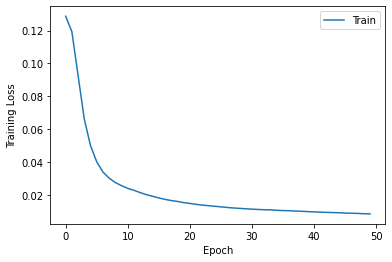

In [9]:
# Train model 
model = Autoencoder()
if use_cuda and torch.cuda.is_available():
  model.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')
  
output = train(model, num_epochs=50, batch_size=64, learning_rate=1e-4)

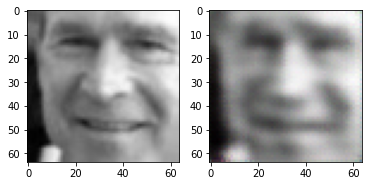

In [10]:
# This code is referenced from: https://pytorch.org/tutorials/beginner/dcgan_faces_tutorial.html
# visualize reconstruction and original image
imgs = output[35][1].detach()
reconstructed = output[35][2].detach()
imgs = np.transpose(vutils.make_grid(imgs[0].to(torch.device("cuda:0"))[:64], padding=2, normalize=True).cpu(),(1,2,0))
reconstructed = np.transpose(vutils.make_grid(reconstructed[0].to(torch.device("cuda:0"))[:64], padding=2, normalize=True).cpu(),(1,2,0))
plt.subplot(1, 2, 1)
plt.imshow(imgs)
plt.subplot(1, 2, 2)
plt.imshow(reconstructed)